[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\82109\AppData\Local\Temp\ipykernel_29576\45823475.py:19: RuntimeWarning: divide by zero encountered in divide
  percentage_error_samsung = np.mean(np.abs((actual_test_returns_samsung - predicted_test_returns_samsung) / actual_test_returns_samsung)) * 100


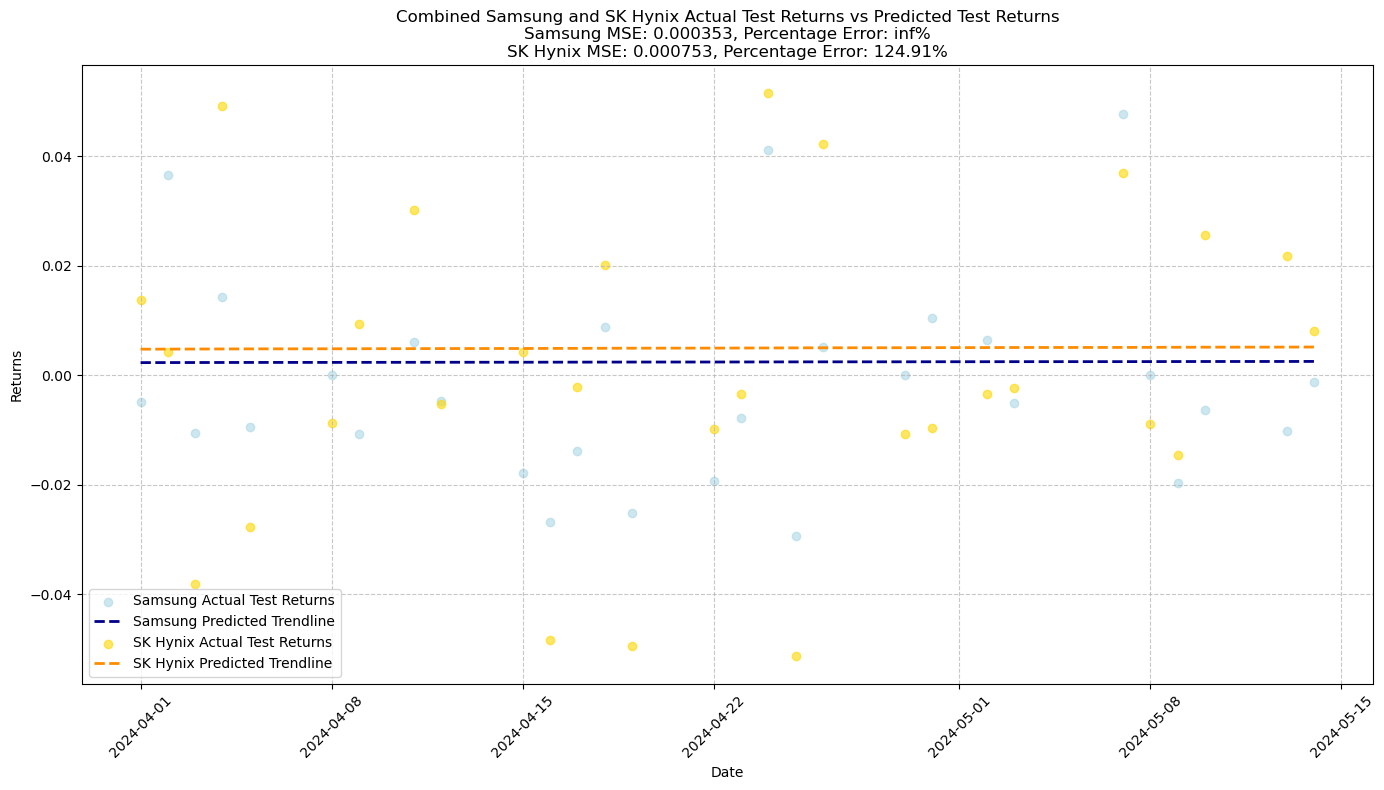

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_returns(data):
    returns = data['Close'].pct_change().dropna()
    return returns

def plot_combined_comparison(test_dates, actual_test_returns_samsung, predicted_test_returns_samsung, actual_test_returns_skhynix, predicted_test_returns_skhynix, title):
    mse_samsung = mean_squared_error(actual_test_returns_samsung, predicted_test_returns_samsung)
    percentage_error_samsung = np.mean(np.abs((actual_test_returns_samsung - predicted_test_returns_samsung) / actual_test_returns_samsung)) * 100

    mse_skhynix = mean_squared_error(actual_test_returns_skhynix, predicted_test_returns_skhynix)
    percentage_error_skhynix = np.mean(np.abs((actual_test_returns_skhynix - predicted_test_returns_skhynix) / actual_test_returns_skhynix)) * 100

    plt.figure(figsize=(14, 8))

    # Plot actual test returns for Samsung
    plt.scatter(test_dates, actual_test_returns_samsung, color='lightblue', label='Samsung Actual Test Returns', alpha=0.6)
    # Plot predicted test returns trendline for Samsung
    plt.plot(test_dates, predicted_test_returns_samsung, color='darkblue', linewidth=2, linestyle='--', label='Samsung Predicted Trendline')

    # Plot actual test returns for SK Hynix
    plt.scatter(test_dates, actual_test_returns_skhynix, color='gold', label='SK Hynix Actual Test Returns', alpha=0.6)
    # Plot predicted test returns trendline for SK Hynix
    plt.plot(test_dates, predicted_test_returns_skhynix, color='darkorange', linewidth=2, linestyle='--', label='SK Hynix Predicted Trendline')

    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.title(f'{title}\nSamsung MSE: {mse_samsung:.6f}, Percentage Error: {percentage_error_samsung:.2f}%\nSK Hynix MSE: {mse_skhynix:.6f}, Percentage Error: {percentage_error_skhynix:.2f}%')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    # Fetch data for Samsung and SK Hynix
    samsung_data = fetch_data('005930.KS', '2022-01-01', '2024-05-15')
    skhynix_data = fetch_data('000660.KS', '2022-01-01', '2024-05-15')

    # Calculate daily returns
    samsung_returns = calculate_returns(samsung_data)
    skhynix_returns = calculate_returns(skhynix_data)

    # Combine the returns data for both stocks
    combined_data = pd.DataFrame({
        'Samsung': samsung_returns,
        'SK Hynix': skhynix_returns
    }).dropna()

    # Split the data into train and test sets (5% for testing)
    train_data, test_data = train_test_split(combined_data, test_size=0.05, shuffle=False)

    # Linear Regression for Samsung
    X_train_samsung = np.arange(len(train_data)).reshape(-1, 1)
    y_train_samsung = train_data['Samsung'].values
    X_test_samsung = np.arange(len(train_data), len(combined_data)).reshape(-1, 1)[:len(test_data)]
    y_test_samsung = test_data['Samsung'].values

    model_samsung = LinearRegression()
    model_samsung.fit(X_train_samsung, y_train_samsung)
    predictions_samsung = model_samsung.predict(X_test_samsung)

    # Linear Regression for SK Hynix
    y_train_skhynix = train_data['SK Hynix'].values
    y_test_skhynix = test_data['SK Hynix'].values

    model_skhynix = LinearRegression()
    model_skhynix.fit(X_train_samsung, y_train_skhynix)  # Note: Using the same X values for simplicity
    predictions_skhynix = model_skhynix.predict(X_test_samsung)

    # Plot 5: Combined comparison of Samsung and SK Hynix
    plot_combined_comparison(test_data.index, y_test_samsung, predictions_samsung, y_test_skhynix, predictions_skhynix, 'Combined Samsung and SK Hynix Actual Test Returns vs Predicted Test Returns')

if __name__ == '__main__':
    main()
